# Clustering

In [1]:
# modules and libraries:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# load/read data:
w = pd.read_csv('wines.csv')
w.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


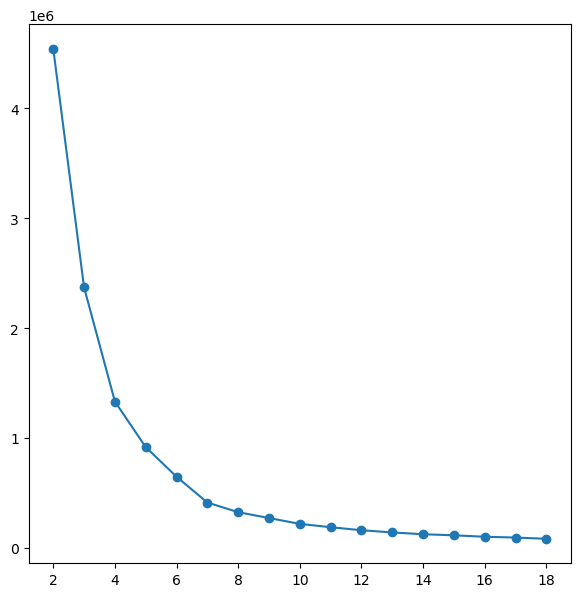

In [3]:
# determing the number of clusters using elbow method:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(w)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

In [4]:
# determing the number of clusters using silhouette method/score:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 10]
llist = []

max_score = -1
best_n = None

for n, nn in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=nn, init='random')
    kmeans.fit(w)

    pred = kmeans.predict(w)
    
    score = silhouette_score(w, labels=kmeans.labels_, metric='euclidean') * 100
    
    llist.append((nn, score))
    
    if score > max_score:
        max_score = score
        best_n = nn
        
print("---")
print(f'Number of clusters: {best_n} and best score is {max_score}')

---
Number of clusters: 2 and best score is 65.68536504294316


In [5]:
# fit the model:
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(w)

# prediction:
pred = kmeans.predict(w)

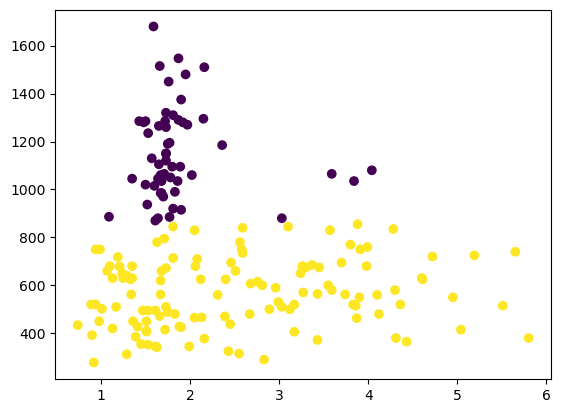

In [6]:
# viz:
x_axis = w.loc[:, ['Malic_Acid']]
y_axis = w.loc[:, ['Proline']]

plt.scatter(x_axis, y_axis, c=pred)

In [7]:
# add clusters to df:
cluster_labels = kmeans.labels_
w['Cluster'] = cluster_labels

w.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# end